# Capítulo 15

### Machine  Learning  é  um  tema  extenso  com  diversas  técnicas,  métodos,  abordagens  e ferramentas. Neste capítulo vamos trazer uma breve introdução ao tema com o  pacote Scikit-Learn em Linguagem Python.

### Scikit-learn
#### Problema
#### Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

In [1]:
# buscando dados históricos para análise (imprescindível)
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# carregando dataset
df_dsa = pd.read_csv('dataset.csv')
df_dsa.shape

(500, 2)

In [3]:
df_dsa.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [4]:
df_dsa.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [5]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


#### Análise exploratória

In [6]:
# verificar se há valores vazios
df_dsa.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [7]:
# correlação
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [8]:
# Resumo estatístico do dataset
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [9]:
# resumo estatístico da variável preditória
df_dsa['horas_estudo_mes'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

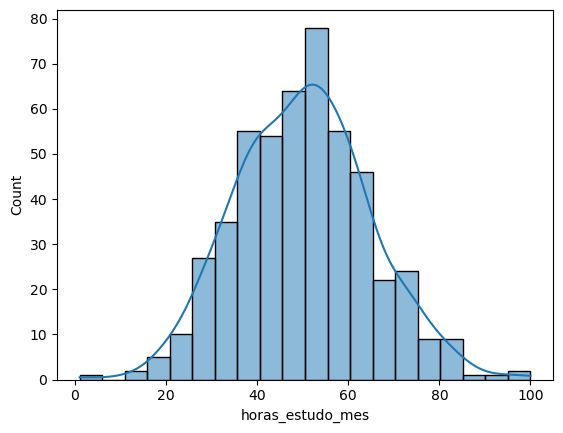

In [10]:
# histograma da variável preditora
sns.histplot(data=df_dsa, x='horas_estudo_mes', kde=True)

#### Preparando o conjunto de dados

In [11]:
# preparar a variável de entrada X (np.array espera receber os dados em formato de array)
x=np.array(df_dsa['horas_estudo_mes'])
type(x)

numpy.ndarray

In [12]:
# Ajusa o shape de x
x=x.reshape(-1,1)

In [13]:
# prepara a variável alvo
y=df_dsa['salario']

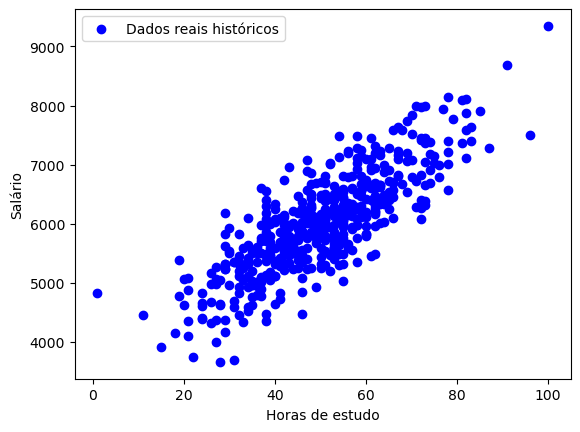

In [14]:
# gráfico de dispersão entre x e y
plt.scatter(x, y, color='blue', label='Dados reais históricos')
plt.xlabel('Horas de estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [ ]:
# dividir dados em treinamento e teste (para modelos mais complexos usamos treino, teste e validação)
x_treino, x_teste, y_treino, y_teste=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_treino.shape


(400, 1)

In [19]:
x_teste.shape


(100, 1)

In [20]:
y_treino.shape


(400,)

In [21]:
y_teste.shape

(100,)

#### Modelagem preditiva
#### scikit_learn.org

In [22]:
# cria o modelo de regressão linear
modelo=LinearRegression()
# treina o modelo
modelo.fit(x_treino,y_treino)

LinearRegression()

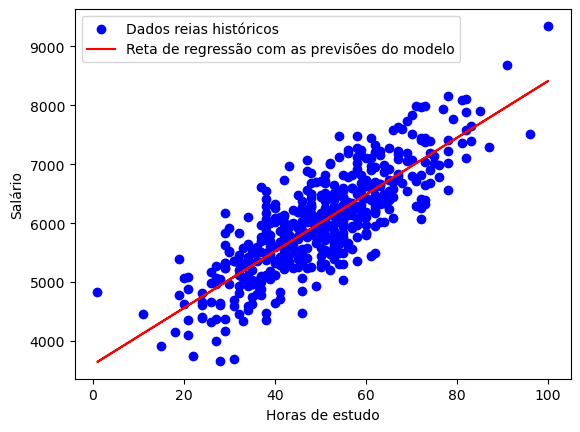

In [23]:
# visualiza a reta de regressão linear (previsões) e os dados usados no treimamento
plt.scatter(x,y,color='blue',label='Dados reias históricos')
plt.plot(x,modelo.predict(x),color='red',label='Reta de regressão com as previsões do modelo')
plt.xlabel('Horas de estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [24]:
# Avalia o modelo nos dados de teste
score=modelo.score(x_teste, y_teste)
print(f'Coeficiente r*2: {score:.2f}')

Coeficiente r*2: 0.59


In [25]:
# intercepto - parâmetro w0
modelo.intercept_

3596.783724372753

In [ ]:
# Slope - parâmetro w1
modelo.coef_

array([48.18185277])

### Deploy do Modelo
#### Usaremos o modelo para prever o salário com base nas horas de estudos

In [27]:
# Define um novo valor para horas de estudos
horas_estudo_novo=np.array([[100]])

# Faz previsão como o modelo treinado
salario_previsto=modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de', horas_estudo_novo, 'horas por mês o seu salário pode ser igual a', salario_previsto)

Se você estudar cerca de [[100]] horas por mês o seu salário pode ser igual a [8414.96900152]


In [28]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
salario=modelo.intercept_+(modelo.coef_*horas_estudo_novo)
print(salario)

[[8414.96900152]]


In [29]:
# Define um novo valor para horas de estudos
horas_estudo_novo=np.array([[65]])

# Faz previsão como o modelo treinado
salario_previsto=modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de', horas_estudo_novo, 'horas por mês o seu salário pode ser igual a', salario_previsto)


Se você estudar cerca de [[65]] horas por mês o seu salário pode ser igual a [6728.60415452]


In [30]:
# Define um novo valor para horas de estudos
horas_estudo_novo=np.array([[80]])

# Faz previsão como o modelo treinado
salario_previsto=modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de', horas_estudo_novo, 'horas por mês o seu salário pode ser igual a', salario_previsto)

Se você estudar cerca de [[80]] horas por mês o seu salário pode ser igual a [7451.33194609]


#### Scikit-Learn
##### https://scikit-learn.org/stable/